# Lab  #1

First and Last Name: Hanzala Akram

Student ID: 500899943

Video URL: N/A - Demo done in class

Standardization Calcualtions:
Midterm Mark Mean: 48.959
Midterm Mark Standard Deviation: 9.697639867514155
Final Mark Mean: 72.735
Final Mark Standard Deviation: 16.574748112716527


Initial Non Standardized Graph:


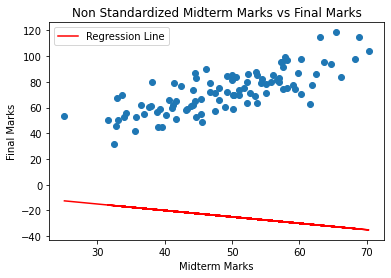



Initial Standardized Graph:


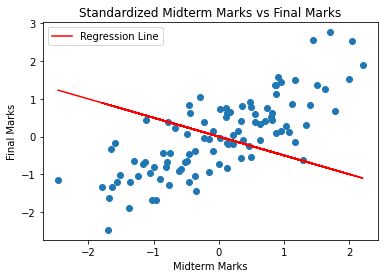



Case 1: Non standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 100


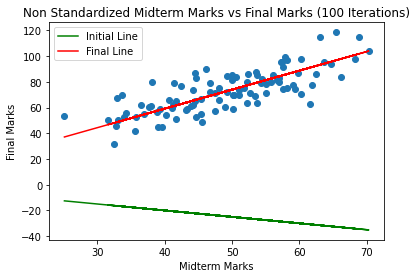

m/slope after 100 iterations is: 1.4789531819722017
b/bias after 100 iterations is: 0.025549654536806642


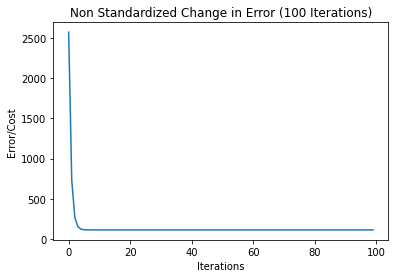

Error/Cost after 100 iterations is: 112.77237974523717


Case 2: Standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 100


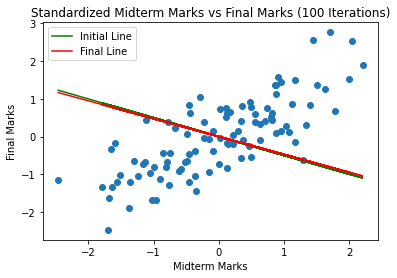

m/slope after 100 iterations is: -0.4747809463889036
b/bias after 100 iterations is: -2.3154811401582253e-18


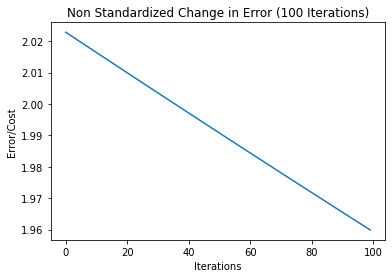

Error/Cost after 100 iterations is: 1.9598823170828026


Case 3: Non standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 2000


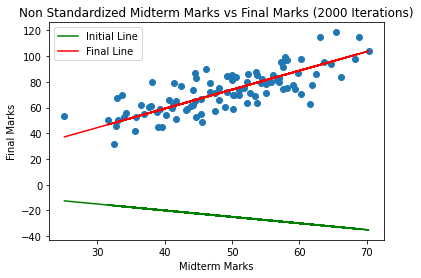

m/slope after 2000 iterations is: 1.4767178860205932
b/bias after 2000 iterations is: 0.1392795143591844


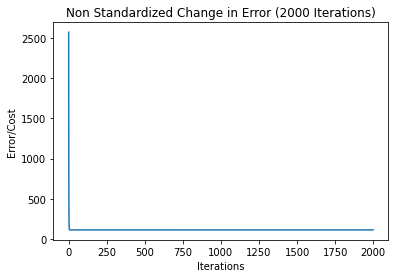

Error/Cost after 2000 iterations is: 112.70428942282048


Case 4: Standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 2000


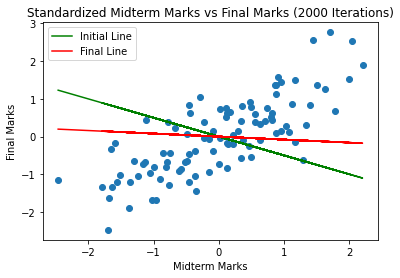

m/slope after 2000 iterations is: -0.08012563486637696
b/bias after 2000 iterations is: -1.8401280499347232e-17


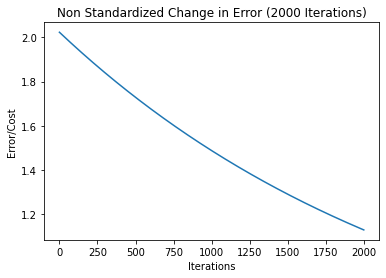

Error/Cost after 2000 iterations is: 1.1303709719800725




<ipython-input-1-94629f4a2bc8>:41: RuntimeWarning: overflow encountered in double_scalars
  errorSum = errorSum + (Y[i] - (m*X[i] + b))**2


Case 5: Non standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 100


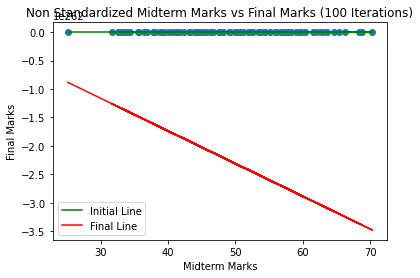

m/slope after 100 iterations is: -5.748490575802123e+260
b/bias after 100 iterations is: 5.617614219047265e+261


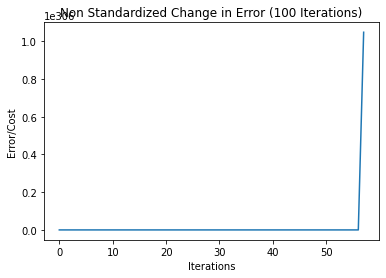

Error/Cost after 100 iterations is: inf


Case 6: Standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 100


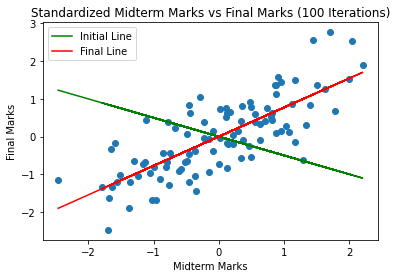

m/slope after 100 iterations is: 0.7734781433087615
b/bias after 100 iterations is: 2.6267876762631205e-16


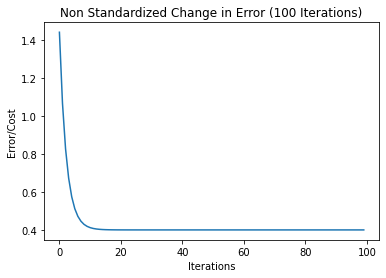

Error/Cost after 100 iterations is: 0.40173156142233113




<ipython-input-1-94629f4a2bc8>:41: RuntimeWarning: overflow encountered in double_scalars
  errorSum = errorSum + (Y[i] - (m*X[i] + b))**2
<ipython-input-1-94629f4a2bc8>:58: RuntimeWarning: overflow encountered in double_scalars
  bGradientSum = bGradientSum + -(Y[i] - (m*X[i] + b))
<ipython-input-1-94629f4a2bc8>:58: RuntimeWarning: invalid value encountered in double_scalars
  bGradientSum = bGradientSum + -(Y[i] - (m*X[i] + b))


Case 7: Non standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 2000


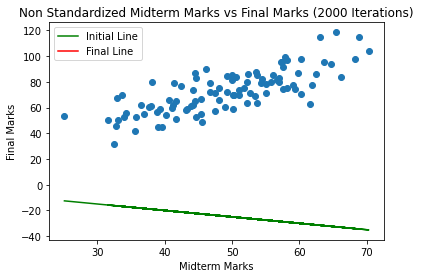

m/slope after 2000 iterations is: nan
b/bias after 2000 iterations is: nan


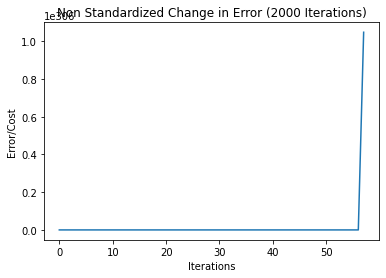

Error/Cost after 2000 iterations is: nan


Case 8: Standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 2000


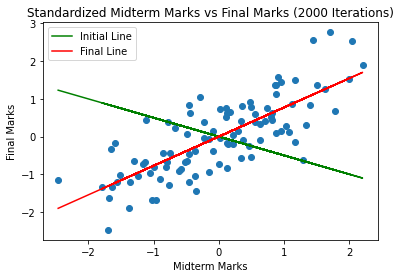

m/slope after 2000 iterations is: 0.7734781435681735
b/bias after 2000 iterations is: 1.92290627865077e-16


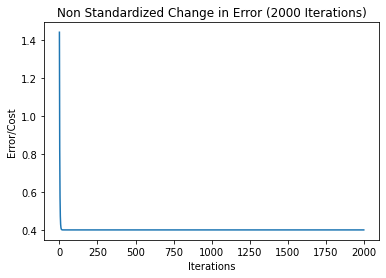

Error/Cost after 2000 iterations is: 0.40173156142233113




In [1]:
import matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression

# Data set to be used 
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")  

# Initalizing values for slope, bias, and learning rate
m = -0.5
b = 0
alpha = 0.0001

# Plot Functions
def plotPoints(xPoints,yPoints,title,xLabel,yLabel):
  plt.scatter(xPoints,yPoints)
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)

def plotLine(m,x,b,lineFormat,lineLabel):
  y = m*x + b
  plt.plot(x,y,lineFormat,label=lineLabel)
  plt.legend()

def plotError(xPoints,yPoints,title,xLabel,yLabel):
  plt.plot(xPoints,yPoints)
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)

# Error/Cost Function
def errorFunc(X,Y,m,b):
  N = len(X)
  errorSum = 0;
  for i in range(N):
    errorSum = errorSum + (Y[i] - (m*X[i] + b))**2
  totalError = errorSum/N
  return totalError

# Gradient Partial Derivative Functions
def mGradientFunc(X,Y,m,b):
  N = len(X)
  mGradientSum = 0;
  for i in range(N):
    mGradientSum = mGradientSum + -X[i]*(Y[i] - (m*X[i] + b))
  mPartialDerivative = (2/N)*mGradientSum
  return mPartialDerivative

def bGradientFunc(X,Y,m,b):
  N = len(X)
  bGradientSum = 0;
  for i in range(N):
    bGradientSum = bGradientSum + -(Y[i] - (m*X[i] + b))
  bPartialDerivative = (2/N)*bGradientSum
  return bPartialDerivative

# Update Functions
def mUpdateFunc(X,Y,m,b,alpha):
  mPartialDerivative = mGradientFunc(X,Y,m,b)
  mNew = m - alpha*mPartialDerivative
  return mNew

def bUpdateFunc(X,Y,m,b,alpha):
  bPartialDerivative = bGradientFunc(X,Y,m,b)
  bNew = b - alpha*bPartialDerivative
  return bNew

# Creating data sets
# Putting non standadized data into variables
X = data['Midterm mark'] 
Y = data['Final mark']

# Mean and standard deviation of data
print("Standardization Calcualtions:")
MidtermMean = np.mean(X)
print("Midterm Mark Mean:", MidtermMean)
MidtermStd = np.std(X)
print("Midterm Mark Standard Deviation:", MidtermStd)
FinalMean = np.mean(Y)
print("Final Mark Mean:", FinalMean)
FinalStd = np.std(Y)
print("Final Mark Standard Deviation:", FinalStd)
print("\n")

# Putting standadized data into variables
Xstd = (X - MidtermMean)/MidtermStd
Ystd = (Y - FinalMean)/FinalStd

# Initial Graphs
print("Initial Non Standardized Graph:")
plotPoints(X,Y,"Non Standardized Midterm Marks vs Final Marks","Midterm Marks","Final Marks")
plotLine(m,X,b,'-r','Regression Line')
plt.show()
print("\n")
print("Initial Standardized Graph:")
plotPoints(Xstd,Ystd,"Standardized Midterm Marks vs Final Marks","Midterm Marks","Final Marks")
plotLine(m,Xstd,b,'-r','Regression Line')
plt.show()
print("\n")

# Case 1: Non standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 100
# Set intial values
m = -0.5
b = 0
alpha = 0.0001
iterations = 100
errorValues = []
# Plot initial line
plotLine(m,X,b,'-g','Initial Line')
# Iterate 100 times
for i in range(iterations):
  m = mUpdateFunc(X,Y,m,b,alpha)
  b = bUpdateFunc(X,Y,m,b,alpha)
  errorValues.append(errorFunc(X,Y,m,b))
# Plot Graphs
print("Case 1: Non standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 100")
plotPoints(X,Y,"Non Standardized Midterm Marks vs Final Marks (100 Iterations)","Midterm Marks","Final Marks")
plotLine(m,X,b,'-r', 'Final Line')
plt.show()
print("m/slope after 100 iterations is:", m)
print("b/bias after 100 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (100 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 100 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 2: Standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 100
# Set intial values
m = -0.5
b = 0
alpha = 0.0001
iterations = 100
errorValues = []
# Plot initial line
plotLine(m,Xstd,b,'-g','Initial Line')
# Iterate 100 times
for i in range(iterations):
  m = mUpdateFunc(Xstd,Ystd,m,b,alpha)
  b = bUpdateFunc(Xstd,Ystd,m,b,alpha)
  errorValues.append(errorFunc(Xstd,Ystd,m,b))
# Plot Graphs
print("Case 2: Standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 100")
plotPoints(Xstd,Ystd,"Standardized Midterm Marks vs Final Marks (100 Iterations)","Midterm Marks","Final Marks")
plotLine(m,Xstd,b,'-r','Final Line')
plt.show()
print("m/slope after 100 iterations is:", m)
print("b/bias after 100 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (100 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 100 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 3: Non standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 2000
# Set intial values
m = -0.5
b = 0
alpha = 0.0001
iterations = 2000
errorValues = []
# Plot initial line
plotLine(m,X,b,'-g','Initial Line')
# Iterate 2000 times
for i in range(iterations):
  m = mUpdateFunc(X,Y,m,b,alpha)
  b = bUpdateFunc(X,Y,m,b,alpha)
  errorValues.append(errorFunc(X,Y,m,b))
# Plot Graphs
print("Case 3: Non standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 2000")
plotPoints(X,Y,"Non Standardized Midterm Marks vs Final Marks (2000 Iterations)","Midterm Marks","Final Marks")
plotLine(m,X,b,'-r', 'Final Line')
plt.show()
print("m/slope after 2000 iterations is:", m)
print("b/bias after 2000 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (2000 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 2000 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 4: Standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 2000
# Set intial values
m = -0.5
b = 0
alpha = 0.0001
iterations = 2000
errorValues = []
# Plot initial line
plotLine(m,Xstd,b,'-g','Initial Line')
# Iterate 2000 times
for i in range(iterations):
  m = mUpdateFunc(Xstd,Ystd,m,b,alpha)
  b = bUpdateFunc(Xstd,Ystd,m,b,alpha)
  errorValues.append(errorFunc(Xstd,Ystd,m,b))
# Plot Graphs
print("Case 4: Standardized marks, m = -0.5, b = 0, alpha = 0.0001, iterations = 2000")
plotPoints(Xstd,Ystd,"Standardized Midterm Marks vs Final Marks (2000 Iterations)","Midterm Marks","Final Marks")
plotLine(m,Xstd,b,'-r','Final Line')
plt.show()
print("m/slope after 2000 iterations is:", m)
print("b/bias after 2000 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (2000 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 2000 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 5: Non standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 100
# Set intial values
m = -0.5
b = 0
alpha = 0.1
iterations = 100
errorValues = []
# Plot initial line
plotLine(m,X,b,'-g','Initial Line')
# Iterate 100 times
for i in range(iterations):
  m = mUpdateFunc(X,Y,m,b,alpha)
  b = bUpdateFunc(X,Y,m,b,alpha)
  errorValues.append(errorFunc(X,Y,m,b))
# Plot Graphs
print("Case 5: Non standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 100")
plotPoints(X,Y,"Non Standardized Midterm Marks vs Final Marks (100 Iterations)","Midterm Marks","Final Marks")
plotLine(m,X,b,'-r', 'Final Line')
plt.show()
print("m/slope after 100 iterations is:", m)
print("b/bias after 100 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (100 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 100 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 6: Standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 100
# Set intial values
m = -0.5
b = 0
alpha = 0.1
iterations = 100
errorValues = []
# Plot initial line
plotLine(m,Xstd,b,'-g','Initial Line')
# Iterate 100 times
for i in range(iterations):
  m = mUpdateFunc(Xstd,Ystd,m,b,alpha)
  b = bUpdateFunc(Xstd,Ystd,m,b,alpha)
  errorValues.append(errorFunc(Xstd,Ystd,m,b))
# Plot Graphs
print("Case 6: Standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 100")
plotPoints(Xstd,Ystd,"Standardized Midterm Marks vs Final Marks (100 Iterations)","Midterm Marks","Final Marks")
plotLine(m,Xstd,b,'-r','Final Line')
plt.show()
print("m/slope after 100 iterations is:", m)
print("b/bias after 100 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (100 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 100 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 7: Non standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 2000
# Set intial values
m = -0.5
b = 0
alpha = 0.1
iterations = 2000
errorValues = []
# Plot initial line
plotLine(m,X,b,'-g','Initial Line')
# Iterate 2000 times
for i in range(iterations):
  m = mUpdateFunc(X,Y,m,b,alpha)
  b = bUpdateFunc(X,Y,m,b,alpha)
  errorValues.append(errorFunc(X,Y,m,b))
# Plot Graphs
print("Case 7: Non standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 2000")
plotPoints(X,Y,"Non Standardized Midterm Marks vs Final Marks (2000 Iterations)","Midterm Marks","Final Marks")
plotLine(m,X,b,'-r', 'Final Line')
plt.show()
print("m/slope after 2000 iterations is:", m)
print("b/bias after 2000 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (2000 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 2000 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

# Case 8: Standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 2000
# Set intial values
m = -0.5
b = 0
alpha = 0.1
iterations = 2000
errorValues = []
# Plot initial line
plotLine(m,Xstd,b,'-g','Initial Line')
# Iterate 2000 times
for i in range(iterations):
  m = mUpdateFunc(Xstd,Ystd,m,b,alpha)
  b = bUpdateFunc(Xstd,Ystd,m,b,alpha)
  errorValues.append(errorFunc(Xstd,Ystd,m,b))
# Plot Graphs
print("Case 8: Standardized marks, m = -0.5, b = 0, alpha = 0.1, iterations = 2000")
plotPoints(Xstd,Ystd,"Standardized Midterm Marks vs Final Marks (2000 Iterations)","Midterm Marks","Final Marks")
plotLine(m,Xstd,b,'-r','Final Line')
plt.show()
print("m/slope after 2000 iterations is:", m)
print("b/bias after 2000 iterations is:", b)
# Plot Error
plotError(range(iterations),errorValues,"Non Standardized Change in Error (2000 Iterations)","Iterations","Error/Cost")
plt.show()
print("Error/Cost after 2000 iterations is:", errorValues[len(errorValues) - 1])
print("\n")

Q1: Cases 5-8 in code above demonstrates what would happen with a learning rate of 0.1. From observing the graphs above we can see when using non standardized values and a large learning rate value the steps are too large and the error cost skyrockets at the end of all iterations making the regression line no where near the plotted points. On the otherhand with standardized values since it takes in deviation and narrows the scale into something more useful the larger steps create a more accurate regression line.

Q2: From my observation of the outputs given above standardization reduces the scale of the points to be alot smaller and closer to one another making the initial regression line fit much better. This makes it so that the data we use is more readable as they follow the same scale and have the same amount of deviation making it more useful when analyzing outcomes as compared to a non standardized graph. It also seems to be trying to remove bias as in the standardized graphs where we did 2000 iterations the b value is very small. 